In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests
from IPython.display import display
import random
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
data = pd.read_csv("clean_data.csv")
data.head(5)

,Name,Price,Rating,Location,Guest,Bed,Bath,Wifi,Pool,Parking
0,Hillside Batu Retreat @ Kuala Kubu Bharu Heights,280,4.92,Kuala Kubu Baru,0,3,3,0,0,0
1,"Tamarind Suites 1 Bedroom, Cyberjaya",14,5.00,Cyberjaya,2,1,1,0,1,0
2,The Sunset @ Kuala Kubu Bharu Heights,161,4.88,Kuala Kubu Baru,2,1,1,0,0,0
3,Mountain View Getaway House with Pool (Lauhaus),111,4.70,Kuala Kubu Baru,2,1,1,1,1,0
4,Netap & Chill Suite | Netflix | 100mbps Wifi,22,4.78,Petaling Jaya,6,2,2,0,0,0


In [3]:
pdfFile = PdfPages("output.pdf")

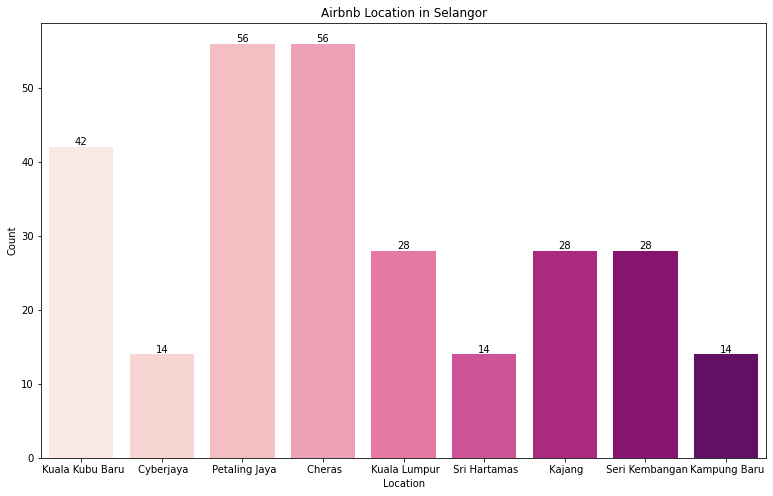

In [4]:
plt.figure(figsize = (13,8))
ax = sns.countplot(x="Location", palette= "RdPu", data=data)
ax.set_ylabel('Count')
ax.set_title('Airbnb Location in Selangor')
for container in ax.containers:
    ax.bar_label(container)
pdfFile.savefig(ax.figure)
# ax.figure.savefig('test.png')

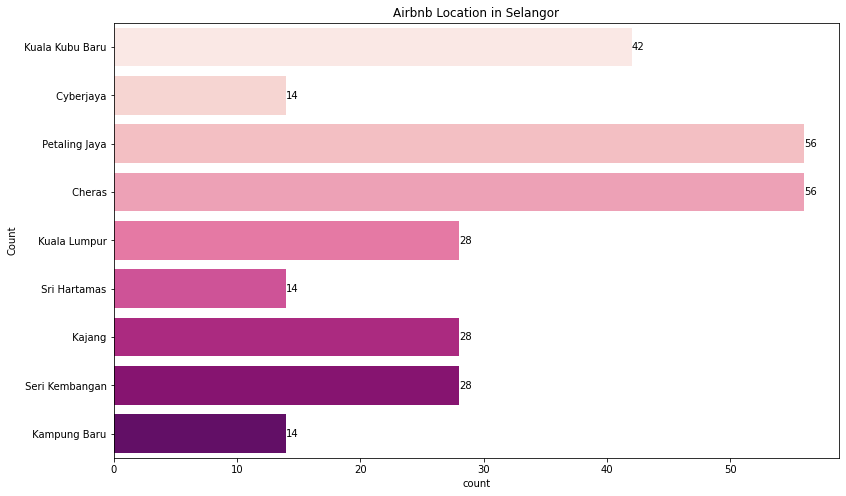

In [5]:
plt.figure(figsize = (13,8))
ax = sns.countplot(y="Location", palette= "RdPu", data=data)
ax.set_ylabel('Count')
ax.set_title('Airbnb Location in Selangor')
for container in ax.containers:
    ax.bar_label(container)
pdfFile.savefig(ax.figure)

In [ ]:
# pdfFile.close()

In [ ]:
# print('test.png')

In [6]:
name = data["Name"].astype("string")

def listToString(name): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in name: 
        str1 += ele  
    
    # return string  
    return str1 

titles = listToString(name)
titles

'Hillside Batu Retreat @ Kuala Kubu Bharu HeightsTamarind Suites 1 Bedroom, CyberjayaThe Sunset @ Kuala Kubu Bharu HeightsMountain View Getaway House with Pool (Lauhaus)Netap & Chill Suite | Netflix | 100mbps WifiGarden In The Sky (WiFi + Netflix + Self Check In)The Hub Damansara (infinity pool, couple stay)1 Super King Bed / Netflix / Bathtub @ Pinnacle PJSimfoni 12: Big Balcony, free parking, WIFI☆ BEST AREA IN KL ★ MODERN. COMPACT. HIGH FLOOR! ☆KL/City Premium Loft @EkoCherasLuxury BestView Suite Near KLCITY Bathtub NetflixTelaga HouseNew. Designer. Simfoni. Hi-Speed WiFi. Netflix. #3Apple Home 5@Menara Simfoni/500 Mbps Wifi/CherasHERITAGE 3 HOMESTAY Studio 4Pax, FREE WIFILandmark 2.7: Queen size bed; TV & ParkingCozy Comfort Studio @ Symphony Tower Cheras South🌟PS4/NETFLIX🌟 SOHO Silk Sky Balakong/C180/TheMinesTraditional Ethnic Style Studio with Infinity PoolHillside Batu Retreat @ Kuala Kubu Bharu HeightsTamarind Suites 1 Bedroom, CyberjayaThe Sunset @ Kuala Kubu Bharu HeightsMoun

ValueError: No figure test.png

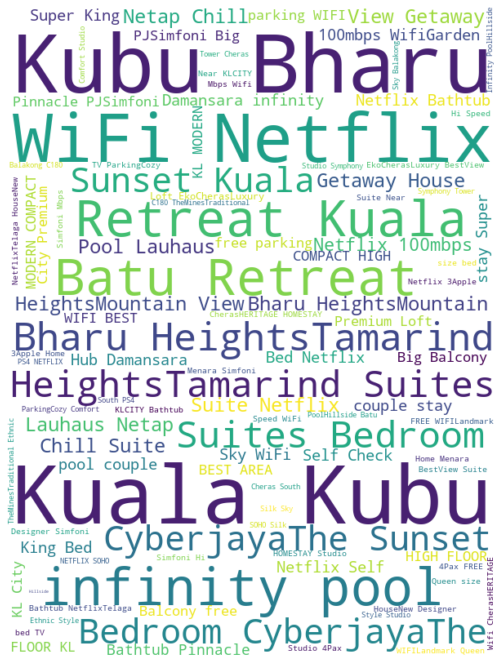

In [17]:
# mask = np.array(Image.open('homestay.jpg')) 

# color= ImageColorGenerator(mask)

wordcloud = WordCloud(width = 600, 
                      height = 800,
                      max_words=1000,
#                       mask=mask,
                      background_color='white',
                      random_state=42).generate(titles)

plt.figure(figsize=(12,12)) # inches
plt.axis("off")
dt = plt.imshow(wordcloud,interpolation='bilinear')
# wordcloud.to_file('test.png')
# pdfFile.savefig(dt)

In [ ]:
# mask = np.array(Image.open('homestay.jpg')) 

# color= ImageColorGenerator(mask)

def generate_wordcloud(titles):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', colormap='plasma').generate(titles)
    plt.figure(figsize=(10,8),facecolor = 'white')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
(generate_wordcloud(titles))

# pdfFile(generate_wordcloud(titles))

In [ ]:
plt.figure(figsize = (13,8))
ax = sns.stripplot(x="Price", y="Location", data=data, jitter=2.0, hue="Location")
#ax = sns.countplot(y="Location", palette= "RdPu", data=data)

dt=ax.set_title('Price of Airbnb based on Location in Selangor')

pdfFile.savefig(dt.figure)

In [ ]:
#price = data["Price"]
price_range = []

for x in data["Price"]:
        if x <=100:
            price_range.append('0-100')
        elif 100< x <=200:
            price_range.append('101-200')
        else:
            price_range.append('201-300')
            
data["Price_Range"] = price_range
data.head(10)

In [ ]:
data.dtypes

In [ ]:
data.Price_Range=data.Price_Range.astype('category')
data.dtypes

In [ ]:
# percent_pool =group_p.Pool.value_counts(normalize = True) * 100
# df = pd.DataFrame(percent_pool)
# df

In [ ]:
percent_pool = pd.crosstab(data.loc[:, "Price_Range"], 
                             data.loc[:, "Pool"])
percent_pool

In [ ]:
percent_pool = pd.crosstab(data.loc[:, "Price_Range"], 
               data.loc[:, "Pool"], 
               normalize = "index") * 100 #Normalized by index so that all rows equals to 100
percent_pool

In [ ]:
c = ["#FEA3AA","#FFE4E1"]
ax = percent_pool.plot(kind='bar', stacked=False, rot=0, color= c, figsize=(13, 8)) 
ax.set_ylabel('Percentage %')
ax.set_title('Percentage of Pool Provided based on Price Range')
for container in ax.containers:
    ax.bar_label(container)
pdfFile.savefig(ax.figure)

In [ ]:
percent_wifi = pd.crosstab(data.loc[:, "Price_Range"], 
               data.loc[:, "Wifi"], 
               normalize = "index") * 100 #Normalized by index so that all rows equals to 100
percent_wifi
c = ["#C48189","#ECC5C0"]
ax = percent_pool.plot(kind='bar', stacked=False, rot=0, color= c, figsize=(13, 8)) 
ax.set_ylabel('Percentage %')
ax.set_title('Percentage of Wifi Provided based on Price Range')
for container in ax.containers:
    ax.bar_label(container)
pdfFile.savefig(ax.figure)

In [ ]:
# sns.boxplot(x ='day', y ='total_bill', data, hue ='smoker')

In [ ]:
pdfFile.close()